In [5]:
import numpy as np # For data manipulation
import pandas as pd # For data representation
import matplotlib.pyplot as plt # For basic visualization
import seaborn as sns  # For synthetic visualization
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # K neighbors classification model
from sklearn.naive_bayes import GaussianNB # Gaussian Naive bayes classification model
from sklearn.svm import SVC # Support Vector Classifier model
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier model
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier model
from sklearn.metrics import accuracy_score # For checking the accuracy of the model

In [7]:
# Importing the dataset
churn_dataset = pd.read_csv('C:/Users/Vijay/Desktop/Aj/Data Science/bankchurn/Churn_Modelling.csv')
# Visualizing first five elements in the dataset
churn_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Checking basic information (rows, columns, missing values, datatypes of columns, etc) in our dataset
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# Checking statistical information in our dataset
churn_dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
# Checking set of unique characters in each categorical feature
for col in churn_dataset.columns:  # Looping over all columns 
    if churn_dataset[col].dtypes == 'object':
        num_of_unique_cat = len(churn_dataset[col].unique()) # Checking the length of unique characters
        print("feature '{col_name}' has '{unique_cat}' unique categories".format(col_name = col, unique_cat=num_of_unique_cat))

feature 'Geography' has '3' unique categories
feature 'Gender' has '2' unique categories


In [15]:
# Deleting the Surname feature from the dataset
churn_dataset = churn_dataset.drop("Surname", axis=1)

KeyError: "['Surname'] not found in axis"

In [19]:
# Creating a pivot table demonstrating the percentile
# Of different genders and geographical regions in exiting the bank 
visualization_1 = churn_dataset.pivot_table("Exited", index="Gender", columns="Geography")
visualization_1

Geography,France,Germany,Spain
Gender,,,
Female,0.203450,0.375524,0.212121
Male,0.127134,0.278116,0.131124


In [20]:
# Deleting gender and geography features from the dataset
churn_dataset = churn_dataset.drop(["Geography", "Gender"], axis=1)

In [22]:
churn_dataset = churn_dataset.drop(["RowNumber", "CustomerId"], axis=1)

KeyError: "['RowNumber' 'CustomerId'] not found in axis"

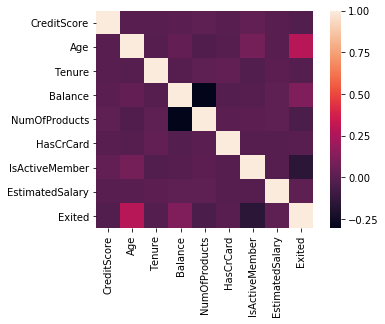

In [24]:
correlation = churn_dataset.corr()
sns.heatmap(correlation.T, square=True, annot=False, fmt="d", cbar=True)

In [26]:
# Shuffling the dataset
churn_dataset = churn_dataset.reindex(np.random.permutation(churn_dataset.index))

In [29]:
data = churn_dataset.drop("Exited", axis=1)
target = churn_dataset["Exited"]

In [31]:
# Splitting feature data and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [33]:
# Creating a python list containing all defined models
model = [GaussianNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=5, random_state=0), LogisticRegression()]
model_names = ["Gaussian Naive bayes", "K-nearest neighbors", "Support vector classifier", "Decision tree classifier", "Random Forest", "Logistic Regression",]
for i in range(0, 6):
    y_pred = model[i].fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)*100
    print(model_names[i], ":", accuracy, "%")

('Gaussian Naive bayes', ':', 77.4, '%')
('K-nearest neighbors', ':', 75.12, '%')
('Support vector classifier', ':', 79.16, '%')
('Decision tree classifier', ':', 78.32000000000001, '%')
('Random Forest', ':', 82.44, '%')
('Logistic Regression', ':', 78.64, '%')


In [44]:
# Working with the selected model

model = RandomForestClassifier(n_estimators = 100, random_state = 5)
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Our accuracy is:", accuracy_score(y_pred, y_test)*100, "%")

('Our accuracy is:', 84.88, '%')


In [63]:
print("Enter the credit score of the client \n")
credit_score = int(input())
print("Enter the age of the client \n")
age = int(input())
print("Enter the tenure of the client \n")
tenure = int(input())
print("Enter the current balance of the client \n")
balance = float(input())
print("Enter the number of product the client use \n")
product_no = int(input())
print("Press 1 if the user has a credit card or 0 if not \n")
credit_card = int(input())
print("Press 1 if the user is an active member or 0 if not \n")
active_member = int(input())
print("Enter the estimated salary of the client \n")
salary = float(input())


X_user = np.array([678,27,10,1020,1,1,100000])

y_pred = model.predict([X_user])
index = y_pred  

print(index)
if index == 1:
   print("\n Client is not exiting the bank")
   elif index == 0:
      print("\n Client is on the threshold of exiting the bank")
 print("\n Consider taking further steps to incentivise the client")

SyntaxError: invalid syntax (<ipython-input-63-661ecda2df59>, line 27)

In [82]:

X_user = np.array([600,50,4,0000,1,1,1,100000])

y_pred = model.predict([X_user])
index = y_pred  

print(index)


[1]
